In [1]:
!pip install yfinance
!pip install mpl_finance
!pip install stockstats
!pip install get-all-tickers
!pip install Yahoo-ticker-downloader

     |████████████████████████████████| 5.5MB 17.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=88663615847bc0040120ed635ab950880a5a00abc9cc69d4484d4b64d9c3631d
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Created wheel for get-all-tickers: filename=get_all_tickers-1.7-cp36-none-any.whl size=4242 sha256=4224136c387c5350d75cac9c4d55718aae31cac6c89d30bf425646d4b6d396f0
  Stored in directory: /root/.cache/pip/wheels/d0/8b/ef/6cd3580f4b479aef881a32bd937c282982e3d186b617a663ac
Successfully built get-all-tickers
     |████████████████████████████████| 51kB 7.6MB/s 
  Created wheel for Yahoo-ticker-downloader: filename=Yahoo_ticker_downloader-3.0.1-cp36-none-any.whl size=10184 sha256=578cb0a0e09024e60a09c018c871ed12c035f1bcbf38a89dff932e9

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
#change this path to the shared folder dir
# root_folder0="/content/drive/My Drive/Trading"
# root_folder0="/content/drive/My Drive/Data_Mining_Final_Project"
root_folder0="/content/drive/My Drive/Data_Mining_Final_Project"
DB_path_basic="Db/DataSet_basic_all_tickers.csv"
DB_path="Db/DataSet_all_tickers_5_years.csv"
%cd $root_folder0
!pwd
!ls
#flat to decide if isntalll or not the libraries
install_libraries=True

Mounted at /content/drive/
/content/drive/.shortcut-targets-by-id/1foEAE__IWUeuhhVK8gXy9QWYQ3B19jeq/Data_Mining_Final_Project
/content/drive/.shortcut-targets-by-id/1foEAE__IWUeuhhVK8gXy9QWYQ3B19jeq/Data_Mining_Final_Project
Db			   no_Data
images			   Papers
loading_data_tes.py	   PCA_and_Granger_causality_test.ipynb
LSTM_attamp_1.ipynb	   ProjectFinalPresentaion.pptx
LSTM_Extended.ipynb	   technical_indicators2.ipynb
LSTM_FABIAN.ipynb	   technical_indicators.ipynb
LSTM_Filtered.ipynb	   Tesla-sentiment_v2_final.ipynb
mean_causation_matrix.csv  utils.py
Models


In [3]:
import yfinance as yf
import pandas_datareader as pdr
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.python.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential

%matplotlib inline

In [5]:
top_tickers=pdr.get_tops_iex().head(10000)
# #searching some important companies, in this case Apple
# for ind,ticker in enumerate(top_tickers.symbol):
#   if ticker =="AAPL":
#     print(str(ind)+" "+ticker)

In [6]:
top_tickers

,symbol,sector,securityType,bidPrice,bidSize,askPrice,askSize,lastUpdated,lastSalePrice,lastSaleSize,lastSaleTime,volume,marketPercent
0,ANDAR,n/a,right,0,0,0,0,1613595600000,0.000,0,0,0,0.00000
1,DFIN,diversifiedfinancials,commonstock,0,0,0,0,1613595602220,22.250,100,1613595581906,21789,0.04178
2,OCSL,diversifiedfinancials,commonstock,0,0,0,0,1613595615039,6.085,15,1613595573361,14215,0.02814
3,THR,capitalgoods,commonstock,0,0,0,0,1613595602337,17.380,68,1613595592061,6161,0.04021
4,ECC,n/a,closedendfund,0,0,0,0,1613595600000,11.570,2,1613595245264,2048,0.03655
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9864,IXC,n/a,etp,0,0,0,0,1613595600243,23.770,100,1613595594041,13896,0.01667
9865,GROW,diversifiedfinancials,commonstock,0,0,0,0,1613564717963,7.310,100,1613595725644,4644,0.01121
9866,JMIA,retailing,adr,0,0,0,0,1613597889492,59.330,6,1613595591002,120416,0.02542
9867,APO,diversifiedfinancials,commonstock,0,0,0,0,1613595601945,51.940,3,1613595595382,26255,0.04369


In [7]:
import numpy as np
#adding manually the first 100 important tickers in the world
# tickers=["BTC-USD"]
# tickers=["TSLA"]
tickers=["ATVI","ADBE","AMD","ALXN","ALGN","GOOGL","GOOG","AMZN","AEP","AMGN","ADI","ANSS","AAPL","AMAT","ASML","TEAM","ADSK","ADP","BIDU","BIIB","BKNG","AVGO","CDNS","CDW","CERN","CHTR","CHKP","CTAS","CSCO","CTSH","CMCSA","CPRT","COST","CSX","DXCM","DOCU","DLTR","EBAY","EA","EXC","FB","FAST","FISV","FOXA","FOX","GILD","IDXX","ILMN","INCY","INTC","INTU","ISRG","JD","KDP","KLAC","KHC","LRCX","LULU","MAR","MRVL","MTCH","MXIM","MELI","MCHP","MU","MSFT","MRNA","MDLZ","MNST","NTES","NFLX","NVDA","NXPI","ORLY","OKTA","PCAR","PAYX","PYPL","PTON","PEP","PDD","QCOM","REGN","ROST","SGEN","SIRI","SWKS","SPLK","SBUX","SNPS","TMUS","TSLA","TXN","TCOM","VRSN","VRSK","VRTX","WBA","WDAY","XEL","XLNX","ZM"]
# new_tickers=np.unique(tickers.index.values)

In [8]:
len(tickers)

102

In [9]:
from stockstats import StockDataFrame
from datetime import date
# stock = StockDataFrame.retype(df_aapl[["Open", "Close", "High", "Low", "Volume"]])
num_years=5
process_DS=False
if process_DS:
  DB_path_basic
  df1= pd.read_csv(DB_path_basic, sep='\t',header=[0,1], index_col=0)
  df1.index = pd.to_datetime(df1.index)
  value_to_check = pd.Timestamp(date.today().year-num_years-1,1,1)
  df1=df1[df1.index>= value_to_check]
  #deleting rows with null values
  # df1=df1.dropna()
  #buffer to store and process the tickers data
  # df1.index.name
  
  buff_Tickers=[]
  Tickers_DF=pd.DataFrame()
  tickers_names=df1.columns.get_level_values('Symbols').unique()#[:2]
  new_tickers_name=[]
  # print(tickers_names)
  for ticker_name in tickers_names:
    # print(df1[ticker_name])
    # bn=df1[ticker_name].columns
    # print(bn)
    temp_df=df1[ticker_name].dropna()
    if len(temp_df)>=(num_years*316*0.9):
      temp_pd=Feature_Extraction(df1[ticker_name])
      buff_Tickers.append(temp_pd)
      new_tickers_name.append(ticker_name)
  #concat all tickers dataframes already processed
  # pdtin=pd.MultiIndex.from_arrays([new_tickers_name],names=('Symbols'))
  pdtin=pd.Index(new_tickers_name,dtype='object',name='Symbols')
  # pdtin=pdtin.set_names(['Symbols'])
  Tickers_DF=pd.concat(buff_Tickers,keys=pdtin,axis=1)
  #pay attention to this because can delete important rows, if there is an error is here.
  Tickers_DF=Tickers_DF.dropna()
  Tickers_DF.to_csv(DB_path,sep='\t',index=True)
else:
  Tickers_DF= pd.read_csv(DB_path, sep='\t',header=[0,1], index_col=0)
  print("DataSet Loaded")

DataSet Loaded


In [10]:
Tickers_DF

Symbols           ATVI                          ...      XLNX                      
Atributes    adj close       close        high  ...    change         vr   vr_6_sma
Date                                            ...                                
2015-01-20   19.347851   20.219999   20.340000  ... -0.388161  31.604860  32.207252
2015-01-21   19.233032   20.100000   20.180000  ...  1.095950  50.626788  32.464639
2015-01-22   19.701893   20.590000   20.600000  ... -6.143096  29.698681  31.890913
2015-01-23   19.759308   20.650000   20.830000  ...  0.821354  38.375717  34.377971
2015-01-26   19.941111   20.840000   20.870001  ... -0.738282  35.403690  37.017611
...                ...         ...         ...  ...       ...        ...        ...
2021-02-09  102.730003  102.730003  103.769997  ... -0.410087  86.518067  82.609826
2021-02-10  102.760002  102.760002  103.440002  ...  1.632934  85.992196  83.666935
2021-02-11  103.239998  103.239998  104.220001  ...  0.733498  83.676748  85.228565
2021-02-12  103.809998  103.809998  103.889999  ...  1.074898  94.513959  87.580061
2021-02-16  102.959999  102.959999  104.529999  ... -2.174956  85.547985  87.228496

[1530 rows x 7371 columns]

In [11]:
ticker_name="TSLA"
Tickers_DF[ticker_name].head()

Atributes,adj close,close,high,low,open,volume,volume_delta,open_-2_r,middle,cr,cr-ma1,cr-ma2,cr-ma3,rsv_9,kdjk_9,kdjk,kdjd_9,kdjd,kdjj_9,kdjj,open_2_sma,macd,macds,macdh,close_20_sma,close_20_mstd,boll,boll_ub,boll_lb,close_10.0_le,close_10.0_le_5_c,cr-ma1_20_c,cr-ma2_xu_cr-ma1_20_c,close_10.0_ge,close_10.0_ge_5_fc,close_-1_s,close_-1_d,rs_6,rsi_6,rs_12,...,wr_10,wr_6,middle_14_sma,cci,middle_20_sma,cci_20,tr,atr,close_10_sma,close_50_sma,dma,high_delta,um,low_delta,dm,pdm,pdm_14_ema,pdm_14,atr_14,pdi_14,pdi,mdm,mdm_14_ema,mdm_14,mdi_14,mdi,dx_14,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,close_3_trix,trix_9_sma,tema,close_2_tema,change,vr,vr_6_sma
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-20,38.386002,38.386002,38.824001,37.408001,38.773998,22516000.0,4500000.0,-0.318784,38.206001,37.064820,36.645786,28.407671,7.978721,23.270673,23.448362,23.448362,24.178665,24.178665,21.987755,21.987755,38.456999,-0.477513,-0.298726,-0.178787,40.748833,1.874585,40.748833,44.498004,36.999663,False,0.0,11.0,False,True,5.0,38.613998,-0.227997,0.168119,14.392255,0.152916,...,76.729327,69.349806,40.723944,-102.386062,40.723944,-102.386062,1.416000,1.578836,40.3106,40.748833,-0.438233,-0.073997,0.000000,-0.521999,0.521999,0.000000,0.077007,0.077007,1.578836,4.877424,4.877424,0.521999,0.665471,0.665471,42.149439,42.149439,79.256860,79.256860,78.771807,78.771807,81.527816,81.527816,-0.460184,-1.132136,-0.348015,38.171331,38.407297,-0.590451,32.842985,34.069765
2015-01-21,39.313999,39.313999,39.736000,37.902000,37.910000,20765000.0,-1751000.0,-0.603040,38.984000,47.809157,34.251999,30.478685,19.354874,40.173609,29.023444,29.023444,25.793592,25.793592,35.483149,35.483149,38.341999,-0.450390,-0.330823,-0.119567,40.638461,1.838368,40.638461,44.315197,36.961726,False,0.0,12.0,False,True,5.0,38.386002,0.927998,0.590842,37.140194,0.403885,...,61.148444,48.827963,40.590103,-64.598218,40.590103,-64.598218,1.834000,1.609777,40.0164,40.638461,-0.622062,0.911999,0.911999,0.493999,0.000000,0.911999,0.208858,0.208858,1.609777,12.974349,12.974349,0.000000,0.560388,0.560388,34.811510,34.811510,45.697955,45.697955,69.152464,69.152464,77.928514,77.928514,-0.471132,-0.571544,-0.360434,38.856181,39.285086,2.417542,42.353033,36.469035
2015-01-22,40.324001,40.324001,40.647999,39.040001,39.400002,20584500.0,-180500.0,1.614492,40.004000,60.423490,34.485642,30.161694,26.504235,66.533274,41.526721,41.526721,31.037968,31.037968,62.504227,62.504227,38.655001,-0.365702,-0.338120,-0.027582,40.616000,1.768245,40.616000,44.152490,37.079510,False,0.0,13.0,False,True,5.0,39.313999,1.010002,1.142935,53.335033,0.701864,...,42.291627,8.881513,40.548238,-22.949097,40.548238,-22.949097,1.607998,1.609572,39.8298,40.616000,-0.786200,0.911999,0.911999,1.138000,0.000000,0.911999,0.317226,0.317226,1.609572,19.708739,19.708739,0.000000,0.474021,0.474021,29.450114,29.450114,19.816116,19.816116,54.876502,54.876502,71.258186,71.258186,-0.456396,0.147215,-0.378369,39.906256,40.326377,2.569065,51.780415,37.107915
2015-01-23,40.257999,40.257999,40.700001,39.666000,40.057999,17193000.0,-3391500.0,5.666048,40.208000,64.058325,36.283938,30.808548,28.474537,72.047764,51.700402,51.700402,37.925446,37.925446,79.250314,79.250314,39.729000,-0.301086,-0.330443,0.029357,40.592133,1.706429,40.592133,44.004991,37.179276,False,0.0,14.0,False,True,5.0,40.324001,-0.066002,1.095506,52.278836,0.687264,...,34.787821,13.426530,40.297286,-4.387034,40.525556,-14.144029,1.034000,1.545898,39.6432,40.592133,-0.948933,0.052002,0.052002,0.625999,0.000000,0.052002,0.277182,0.277182,1.545898,17.930184,17.930184,0.000000,0.402452,0.402452,26.033566,26.033566,18.431963,18.431963,44.369219,44.369219,63.505858,63.505858,-0.428261,0.486147,-0.395260,40.310628,40.313691,-0.163679,48.000773,39.835961
2015-01-26,41.310001,41.310001,41.723999,40.209999,40.366001,16172500.0,-1020500.0,2.451776,41.081333,75.263597,37.264815,31.480090,28.407671,91.236288,64.879031,64.879031,46.909974,46.909974

In [12]:
Tickers_DF[ticker_name,"close"]

Date
2015-01-20     38.386002
2015-01-21     39.313999
2015-01-22     40.324001
2015-01-23     40.257999
2015-01-26     41.310001
                 ...    
2021-02-09    849.460022
2021-02-10    804.820007
2021-02-11    811.659973
2021-02-12    816.119995
2021-02-16    796.219971
Name: (TSLA, close), Length: 1530, dtype: float64

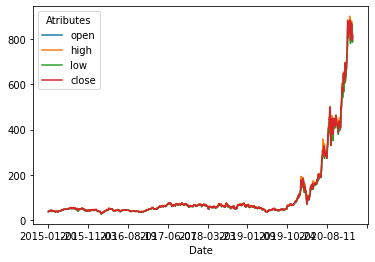

In [13]:
Tickers_DF[ticker_name][map(str.lower,["Open", "High", "Low", "Close"])].plot()
plt.show()

# Extended Companies DB

In [14]:
ticker_name="TSLA"
features = ["open", "high", "low", "close"]
ext_db = Tickers_DF[ticker_name][features]

ext_db.head()

Atributes,open,high,low,close
Date,,,,
2015-01-20,38.773998,38.824001,37.408001,38.386002
2015-01-21,37.910000,39.736000,37.902000,39.313999
2015-01-22,39.400002,40.647999,39.040001,40.324001
2015-01-23,40.057999,40.700001,39.666000,40.257999
2015-01-26,40.366001,41.723999,40.209999,41.310001


In [15]:
print(tickers)

coorps = tickers #["ATVI","ADBE","AMD","ALXN","ALGN","GOOGL","GOOG"]

for coorp in coorps:
  for feat in features:
    try:
      ext_db[coorp+'_'+feat] = Tickers_DF[coorp][feat] 
    except KeyError as err:
      print("OS error: {0}".format(err))

df_close = ext_db.pop("close")
ext_db["close"] = df_close
df = ext_db
df

['ATVI', 'ADBE', 'AMD', 'ALXN', 'ALGN', 'GOOGL', 'GOOG', 'AMZN', 'AEP', 'AMGN', 'ADI', 'ANSS', 'AAPL', 'AMAT', 'ASML', 'TEAM', 'ADSK', 'ADP', 'BIDU', 'BIIB', 'BKNG', 'AVGO', 'CDNS', 'CDW', 'CERN', 'CHTR', 'CHKP', 'CTAS', 'CSCO', 'CTSH', 'CMCSA', 'CPRT', 'COST', 'CSX', 'DXCM', 'DOCU', 'DLTR', 'EBAY', 'EA', 'EXC', 'FB', 'FAST', 'FISV', 'FOXA', 'FOX', 'GILD', 'IDXX', 'ILMN', 'INCY', 'INTC', 'INTU', 'ISRG', 'JD', 'KDP', 'KLAC', 'KHC', 'LRCX', 'LULU', 'MAR', 'MRVL', 'MTCH', 'MXIM', 'MELI', 'MCHP', 'MU', 'MSFT', 'MRNA', 'MDLZ', 'MNST', 'NTES', 'NFLX', 'NVDA', 'NXPI', 'ORLY', 'OKTA', 'PCAR', 'PAYX', 'PYPL', 'PTON', 'PEP', 'PDD', 'QCOM', 'REGN', 'ROST', 'SGEN', 'SIRI', 'SWKS', 'SPLK', 'SBUX', 'SNPS', 'TMUS', 'TSLA', 'TXN', 'TCOM', 'VRSN', 'VRSK', 'VRTX', 'WBA', 'WDAY', 'XEL', 'XLNX', 'ZM']
OS error: 'TEAM'
OS error: 'TEAM'
OS error: 'TEAM'
OS error: 'TEAM'
OS error: 'DOCU'
OS error: 'DOCU'
OS error: 'DOCU'
OS error: 'DOCU'
OS error: 'FOXA'
OS error: 'FOXA'
OS error: 'FOXA'
OS error: 'FOXA'
OS 

Atributes,open,high,low,ATVI_open,ATVI_high,ATVI_low,ATVI_close,ADBE_open,ADBE_high,ADBE_low,ADBE_close,AMD_open,AMD_high,AMD_low,AMD_close,ALXN_open,ALXN_high,ALXN_low,ALXN_close,ALGN_open,ALGN_high,ALGN_low,ALGN_close,GOOGL_open,GOOGL_high,GOOGL_low,GOOGL_close,GOOG_open,GOOG_high,GOOG_low,GOOG_close,AMZN_open,AMZN_high,AMZN_low,AMZN_close,AEP_open,AEP_high,AEP_low,AEP_close,AMGN_open,...,TSLA_high,TSLA_low,TSLA_close,TXN_open,TXN_high,TXN_low,TXN_close,TCOM_open,TCOM_high,TCOM_low,TCOM_close,VRSN_open,VRSN_high,VRSN_low,VRSN_close,VRSK_open,VRSK_high,VRSK_low,VRSK_close,VRTX_open,VRTX_high,VRTX_low,VRTX_close,WBA_open,WBA_high,WBA_low,WBA_close,WDAY_open,WDAY_high,WDAY_low,WDAY_close,XEL_open,XEL_high,XEL_low,XEL_close,XLNX_open,XLNX_high,XLNX_low,XLNX_close,close
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-20,38.773998,38.824001,37.408001,20.340000,20.340000,19.799999,20.219999,71.790001,71.989998,70.580002,71.489998,2.390000,2.430000,2.190000,2.240000,181.750000,183.250000,177.949997,183.059998,57.090000,57.220001,55.450001,56.240002,512.770020,515.609985,509.369995,509.940002,509.600891,511.096771,504.630524,505.512115,292.589996,293.359985,286.390015,289.440002,64.000000,64.050003,63.020000,63.529999,159.210007,...,38.824001,37.408001,38.386002,53.490002,54.150002,53.189999,53.810001,23.000000,23.500000,23.000000,23.260000,56.759998,56.970001,55.619999,56.160000,63.000000,63.490002,62.430000,63.200001,123.139999,125.260002,121.029999,124.739998,76.080002,76.489998,75.309998,76.050003,78.720001,78.980003,77.000000,78.320000,37.139999,37.299999,36.849998,37.270000,41.450001,41.860001,40.980000,41.060001,38.386002
2015-01-21,37.910000,39.736000,37.902000,20.110001,20.180000,19.930000,20.100000,71.160004,71.889999,70.370003,71.540001,2.180000,2.450000,2.140000,2.450000,181.960007,183.179993,178.470001,179.259995,56.240002,57.049999,55.669998,55.900002,510.839996,521.849976,509.589996,520.390015,505.861145,517.858215,504.814026,516.621643,289.640015,306.000000,287.260010,297.250000,63.380001,64.250000,62.950001,64.139999,155.380005,...,39.736000,37.902000,39.313999,53.299999,54.470001,53.200001,54.279999,23.320000,24.530001,23.275000,24.424999,55.889999,56.639999,55.680000,56.369999,62.869999,63.630001,62.740002,63.430000,123.709999,126.209999,123.709999,125.089996,75.519997,76.449997,75.059998,75.589996,78.269997,81.400002,77.900002,80.389999,37.169998,37.639999,36.900002,37.580002,40.810001,41.630001,40.779999,41.509998,39.313999
2015-01-22,39.400002,40.647999,39.040001,20.160000,20.600000,20.049999,20.590000,71.900002,73.650002,70.900002,73.480003,2.420000,2.500000,2.370000,2.470000,180.580002,181.919998,174.570007,180.320007,56.130001,58.110001,55.959999,58.009998,523.000000,538.840027,521.909973,537.299988,520.052185,534.861511,518.277100,532.926819,300.000000,312.250000,300.000000,310.320007,64.559998,64.629997,63.669998,64.080002,158.169998,...,40.647999,39.040001,40.324001,54.320000,54.980000,53.340000,54.970001,24.540001,24.934999,24.355000,24.735001,55.240002,56.430000,54.950001,56.200001,63.540001,64.440002,63.389999,64.260002,125.410004,127.690002,122.010002,127.300003,75.970001,76.209999,75.129997,76.019997,80.699997,81.870003,79.629997,81.400002,37.700001,37.759998,37.169998,37.520000,38.110001,39.840000,37.200001,38.959999,40.324001
2015-01-23,40.057999,40.700001,39.666000,20.590000,20.830000,20.520000,20.650000,73.440002,74.400002,73.059998,74.059998,2.480000,2.500000,2.430000,2.450000,180.529999,183.369995,180.259995,183.320007,58.029999,58.160000,57.009998,57.459999,538.030029,545.409973,535.750000,541.950012,534.123535,540.685547,531.540649,538.471619,308.079987,316.929993,307.720001,312.390015,64.379997,64.900002,64.120003,64.519997,159.800003,...,40.700001,39.666000,40.257999,54.959999,55.290001,54.540001,55.060001,24.820000,25.355000,24.580000,25.049999,56.040001,57.910000,56.029999,56.810001,64.139999,65.339996,63.970001,65.110001,126.720001,127.019997,

## Normalization

In [16]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

1377 153


In [17]:
test

Atributes,open,high,low,ATVI_open,ATVI_high,ATVI_low,ATVI_close,ADBE_open,ADBE_high,ADBE_low,ADBE_close,AMD_open,AMD_high,AMD_low,AMD_close,ALXN_open,ALXN_high,ALXN_low,ALXN_close,ALGN_open,ALGN_high,ALGN_low,ALGN_close,GOOGL_open,GOOGL_high,GOOGL_low,GOOGL_close,GOOG_open,GOOG_high,GOOG_low,GOOG_close,AMZN_open,AMZN_high,AMZN_low,AMZN_close,AEP_open,AEP_high,AEP_low,AEP_close,AMGN_open,...,TSLA_high,TSLA_low,TSLA_close,TXN_open,TXN_high,TXN_low,TXN_close,TCOM_open,TCOM_high,TCOM_low,TCOM_close,VRSN_open,VRSN_high,VRSN_low,VRSN_close,VRSK_open,VRSK_high,VRSK_low,VRSK_close,VRTX_open,VRTX_high,VRTX_low,VRTX_close,WBA_open,WBA_high,WBA_low,WBA_close,WDAY_open,WDAY_high,WDAY_low,WDAY_close,XEL_open,XEL_high,XEL_low,XEL_close,XLNX_open,XLNX_high,XLNX_low,XLNX_close,close
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-07-09,279.398010,281.712006,270.256012,79.930000,80.750000,78.820000,80.639999,460.440002,463.799988,451.880005,460.839996,53.520000,57.580002,53.310001,57.259998,108.709999,109.250000,106.239998,108.470001,278.670013,279.809998,268.769989,274.079987,1509.930054,1529.140015,1495.589966,1518.660034,1506.449951,1522.719971,1488.084961,1510.989990,3115.989990,3193.879883,3074.000000,3182.629883,81.919998,82.430000,80.480003,82.019997,250.250000,...,281.712006,270.256012,278.855988,128.789993,131.990005,126.900002,130.429993,27.690001,27.889999,26.840000,26.900000,210.919998,213.619995,209.600006,212.610001,172.490005,173.990005,170.580002,173.199997,295.519989,297.790009,290.049988,295.399994,40.200001,40.250000,38.049999,39.009998,199.440002,200.000000,193.940002,197.559998,63.070000,63.570000,62.139999,63.240002,99.650002,101.129997,98.349998,100.230003,278.855988
2020-07-10,279.200012,309.783997,275.201996,80.720001,81.529999,79.629997,81.269997,460.829987,467.209991,455.480011,466.200012,57.540001,58.150002,55.509998,55.880001,108.379997,109.199997,107.769997,108.820000,273.600006,274.000000,269.929993,273.290009,1513.250000,1541.339966,1500.719971,1539.010010,1506.150024,1543.829956,1496.540039,1541.739990,3191.760010,3215.000000,3135.699951,3200.000000,82.050003,84.440002,82.050003,84.150002,250.649994,...,309.783997,275.201996,308.929993,130.220001,131.240005,128.960007,130.529999,26.500000,27.030001,26.040001,26.799999,211.779999,212.320007,209.479996,209.990005,173.600006,174.289993,170.710007,174.169998,293.950012,295.000000,290.859985,294.450012,38.669998,40.189999,38.500000,40.119999,196.860001,196.889999,193.360001,195.880005,63.349998,64.239998,63.220001,63.770000,99.660004,100.059998,98.089996,99.139999,308.929993
2020-07-13,331.799988,358.997986,294.221985,82.010002,82.050003,77.519997,77.949997,469.769989,470.609985,440.640015,442.470001,56.680000,58.349998,53.380001,53.590000,108.750000,110.320000,106.400002,107.029999,274.929993,279.459991,269.450012,270.239990,1549.939941,1576.359985,1506.560059,1512.229980,1550.000000,1577.131958,1505.243042,1511.339966,3251.060059,3344.290039,3068.389893,3104.000000,83.900002,85.080002,83.529999,84.760002,249.830002,...,358.997986,294.221985,299.411987,132.000000,133.589996,128.490005,128.820007,27.000000,27.410000,26.670000,26.840000,211.190002,211.190002,200.699997,201.000000,175.210007,176.449997,172.050003,172.850006,293.049988,296.850006,283.850006,284.820007,40.180000,40.360001,39.450001,39.580002,196.529999,197.160004,184.259995,184.770004,63.169998,64.930000,63.169998,64.169998,100.120003,101.470001,97.790001,97.910004,299.411987
2020-07-14,311.200012,318.000000,286.200012,76.809998,79.889999,76.209999,79.769997,435.739990,437.209991,416.290009,433.779999,53.299999,54.860001,52.259998,54.720001,106.889999,109.139999,105.669998,108.570000,269.040009,299.959991,267.630005,299.619995,1492.790039,1522.800049,1485.930054,1520.859985,1490.310059,1522.949951,1483.500000,1520.579956,3089.000000,3127.379883,2950.000000,3084.000000,84.599998,86.059998,84.440002,85.349998,242.759995,...,318.000000,286.200012,303.359985,127.79

In [18]:
from sklearn.preprocessing import RobustScaler

f_columns = list(df.columns)[:-1]

f_transformer = MinMaxScaler()
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
train.loc[:, f_columns] = f_transformer.transform(
  train[f_columns].to_numpy()
)

test.loc[:, f_columns] = f_transformer.transform(
  test[f_columns].to_numpy()
)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib

In [19]:
close_transformer = MinMaxScaler()
close_transformer = close_transformer.fit(train[['close']])
train.loc[:,'close'] = close_transformer.transform(train[['close']])
test.loc[:,'close'] = close_transformer.transform(test[['close']])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


## Preprocessing

In [20]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [27]:
time_steps = 50

X_train, y_train = create_dataset(train, train.close, time_steps)
X_test, y_test = create_dataset(test, test.close, time_steps)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1327, 50, 368) (1327,)
(103, 50, 368) (103,)


## Model

In [28]:
ext_model = keras.Sequential()
ext_model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128,
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
ext_model.add(keras.layers.Dropout(rate=0.2))
ext_model.add(keras.layers.Dense(units=1))
ext_model.compile(loss='mean_squared_error', optimizer='adam')

## Training

In [ ]:
import datetime, os

# checkpoint_filepath = 'Models/Ext_checkpoint_EP_{epoch:02d}-VAL_{val_loss:.2f}__'+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+'.hdf5'

# model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     monitor='val_loss',
#     save_best_only=True)

history = ext_model.fit(
    X_train, y_train,
    epochs=700,
    batch_size=64,
    validation_split=0.1,
    shuffle=False)
    # shuffle=False,
    # callbacks=[model_checkpoint_callback])

Epoch 1/700
19/19 [==============================] - 3s 46ms/step - loss: 0.5797 - val_loss: 0.1294
Epoch 2/700
19/19 [==============================] - 0s 14ms/step - loss: 0.1614 - val_loss: 0.1619
Epoch 3/700
19/19 [==============================] - 0s 12ms/step - loss: 0.0309 - val_loss: 0.1686
Epoch 4/700
19/19 [==============================] - 0s 12ms/step - loss: 0.1108 - val_loss: 0.0303
Epoch 5/700
19/19 [==============================] - 0s 12ms/step - loss: 0.0751 - val_loss: 0.2678
Epoch 6/700
19/19 [==============================] - 0s 12ms/step - loss: 0.2881 - val_loss: 0.2167
Epoch 7/700
19/19 [==============================] - 0s 12ms/step - loss: 0.0185 - val_loss: 0.1731
Epoch 8/700
19/19 [==============================] - 0s 12ms/step - loss: 0.0088 - val_loss: 0.1464
Epoch 9/700
19/19 [==============================] - 0s 21ms/step - loss: 0.0038 - val_loss: 0.1681
Epoch 10/700
19/19 [==============================] - 0s 12ms/step - loss: 0.0031 - val_loss: 0.1648

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(ticker_name+' -   num years:   5'+"   step size:  "+str(time_steps))
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.show()

## Prediction

In [ ]:
# ext_model.load_weights(checkpoint_filepath)

y_hat = ext_model.predict(X_test)

#plotting
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title(ticker_name+' -   num years:  5'+"   step size:  "+str(time_steps))
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.show();